# Exemplo de Uso – Vassoura 

Este notebook mostra como utilizar as principais funcionalidades do pacote `vassoura` para detectar e limpar multicolinearidade, além de gerar relatórios visuais.

In [1]:
import numpy as np
import pandas as pd
import vassoura as vs
import matplotlib.pyplot as plt
import seaborn as sns

## Criando um DataFrame de exemplo com colinearidade artificial

In [2]:
rng = np.random.default_rng(42)
n = 10000
df = pd.DataFrame({
    'x1': rng.normal(0, 1, n),
})
df['x2'] = df['x1'] * 0.95 + rng.normal(0, 0.05, n)
df['x3'] = rng.normal(0, 1, n)
df['cat'] = rng.choice(['A', 'B', 'C'], size=n)
df['target'] = ((df['x1'] + df['x3']) > 0).astype(int)
df.head()

,x1,x2,x3,cat,target
0,0.304717,0.298295,-1.658201,C,0
1,-1.039984,-0.943029,0.891207,C,0
2,0.750451,0.639315,-0.058032,C,1
3,0.940565,0.879272,-0.599909,B,1
4,-1.951035,-1.812026,-0.250818,B,0


## Detectando e limpando multicolinearidade

In [3]:
df_limpo, removidas, matriz_corr, vif_df = vs.clean(
    df,
    target_col='target',
    include_target=False,
    keep_cols=['x1'],
    corr_threshold=0.9,
    vif_threshold=10,
    verbose=True
)

INFO | x1 -> numérica
INFO | x2 -> numérica
INFO | x3 -> numérica
INFO | cat -> categórica (3 categorias)
INFO | Método de correlação sugerido: spearman
INFO | Matriz de correlação spearman calculada para 3 variáveis numéricas
INFO | Encontrados 1 pares com |corr| > 0.90
INFO | Removendo 'x2' devido a |corr|=0.998 com 'x1'
INFO | x1 -> numérica
INFO | x3 -> numérica
INFO | cat -> categórica (3 categorias)
INFO | VIF calculado para 2 variáveis
INFO | Iteração 1: nenhum VIF > 10.00 restante
INFO | x1 -> numérica
INFO | x3 -> numérica
INFO | cat -> categórica (3 categorias)
INFO | VIF calculado para 2 variáveis


In [4]:
print('Variáveis removidas:', removidas)

Variáveis removidas: ['x2']


## Visualizando VIF das variáveis remanescentes

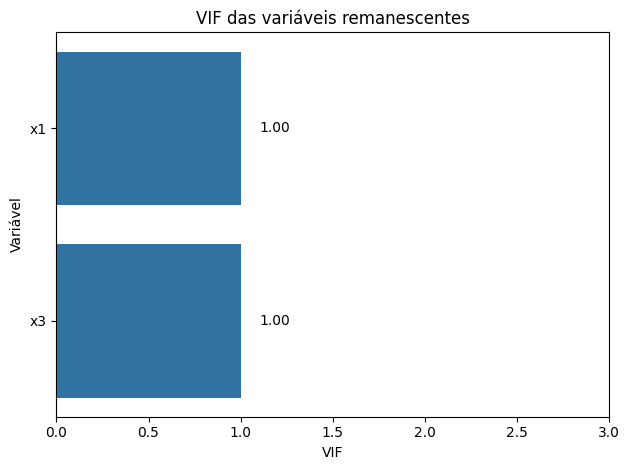

In [5]:
sns.barplot(data=vif_df, y='variable', x='vif', orient='h')
plt.title('VIF das variáveis remanescentes')
for i, row in vif_df.iterrows():
    plt.text(row['vif'] + 0.1, i, f"{row['vif']:.2f}", va='center')
plt.xlabel('VIF')
plt.ylabel('Variável')
plt.xlim(0, max(vif_df['vif']) + 2)
plt.tight_layout()
plt.show()

## Geração de relatório com gráficos e análise com/sem target
O relatório indicará automaticamente o método de correlação aplicado.

In [ ]:
vs.generate_report(
    df,
    target_col='target',
    output_path='vassoura_report.html'
)

INFO | x1 -> numérica
INFO | x2 -> numérica
INFO | x3 -> numérica
INFO | cat -> categórica (3 categorias)
INFO | x1 -> numérica
INFO | x2 -> numérica
INFO | x3 -> numérica
INFO | cat -> categórica (3 categorias)
INFO | Matriz de correlação spearman calculada para 3 variáveis numéricas
INFO | x1 -> numérica
INFO | x2 -> numérica
INFO | x3 -> numérica
INFO | cat -> categórica (3 categorias)
INFO | VIF calculado para 3 variáveis
INFO | x1 -> numérica
INFO | x2 -> numérica
INFO | x3 -> numérica
INFO | cat -> categórica (3 categorias)
INFO | Matriz de correlação spearman calculada para 3 variáveis numéricas
INFO | Encontrados 1 pares com |corr| > 0.90
INFO | Removendo 'x2' devido a |corr|=0.998 com 'x1'
INFO | x1 -> numérica
INFO | x3 -> numérica
INFO | cat -> categórica (3 categorias)
INFO | VIF calculado para 2 variáveis
INFO | Iteração 1: nenhum VIF > 10.00 restante
INFO | x1 -> numérica
INFO | x3 -> numérica
INFO | cat -> categórica (3 categorias)
INFO | VIF calculado para 2 variáveis
I

'vassoura_report.html'

Abra o arquivo `vassoura_report.html` para visualizar o relatório gerado com:
- Tipos de variáveis
- Matrizes de correlação (com e sem target)
- VIF (em tabela e gráfico)
- Método de correlação aplicado